# Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport

# Initialize and show in table

In [2]:
EDA_df = pd.read_csv('../datasets/EDA_df.csv')

In [3]:
EDA_df.head()

customer_id  gender  senior_citizen  partner  dependents  phone_service  \
0  7590-VHVEG       0               0        0           0              0   
1  5575-GNVDE       1               0        0           0              0   
2  3668-QPYBK       1               0        0           0              0   
3  7795-CFOCW       1               0        0           0              0   
4  9237-HQITU       0               0        0           0              0   

   multiple_lines  online_security  online_backup  device_protection  ...  \
0               0                0              1                  0  ...   
1               0                1              0                  1  ...   
2               0                1              1                  0  ...   
3               0                1              0                  1  ...   
4               0                0              0                  0  ...   

   contract_one_year  contract_two_year  \
0                0.0                0.0   
1                1.0                0.0   
2                0.0                0.0   
3                1.0                0.0   
4                0.0                0.0   

   payment_method_bank_transfer_automatic  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     1.0   
4                                     0.0   

   payment_method_credit_card_automatic  payment_method_electronic_check  \
0                                   0.0                              1.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              1.0   

   payment_method_mailed_check  tenure  monthly_charges  total_charges  churn  
0                          0.0       1            29.85          29.85      0  
1                          1.0      34            56.95        1936.30      0  
2                          1.0       2            53.85         107.70      1  
3                          0.0      45            42.30        1903.50      0  
4                          0.0       2            70.70         141.40      1  

[5 rows x 28 columns]

## Number of churn for target 0

In [4]:
EDA_df[EDA_df['churn'] == 0].shape[0]

5174

## Number of churn for target 1

In [5]:
EDA_df[EDA_df['churn'] == 1].shape[0]

1869

## Target class churn composition
Perbandingan antara churn=1: churn=0 adalah 4:11, maka dataset ini dengan target class churn adalah imbalanced.

0    5174
1    1869
Name: churn, dtype: int64

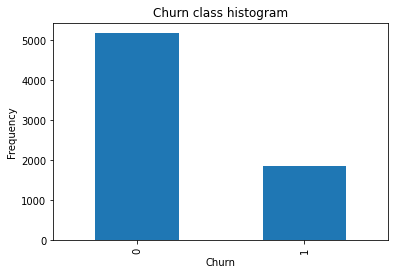

In [6]:
pd.value_counts(EDA_df['churn']).plot.bar()
plt.title('Churn class histogram')
plt.xlabel('Churn')
plt.ylabel('Frequency')
EDA_df['churn'].value_counts()

# Profile Report

In [7]:
ProfileReport(EDA_df)

# Scatterplot in 3D and 2D

## tenure, monthly_charges, and total_charges by churn
- Pelanggan yang berlangganan layanan telekomunikasi dengan monthly charge yang mid-high, kemungkinan churn nya lebih besar bernilai 1 (Yes), dibandingkan dengan monthly charges low-mid.

In [8]:
fig = px.scatter_3d(EDA_df, x='tenure', y='monthly_charges', z='total_charges', color='churn')

fig.show()

## tenure, monthly_charges, and total_charges by tenure

In [9]:
fig = px.scatter_3d(EDA_df, x='tenure', y='monthly_charges', z='total_charges', color='tenure')

fig.show()

## tenure, monthly_charges, and total_charges by total_charges

In [10]:
fig = px.scatter_3d(EDA_df, x='tenure', y='monthly_charges', z='total_charges', color='total_charges')

fig.show()

## tenure and monthly_charges

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

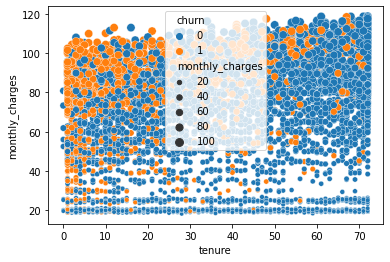

In [11]:
sns.scatterplot(data=EDA_df, x='tenure', y='monthly_charges', hue='churn', size='monthly_charges')

## tenure and total_charges

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

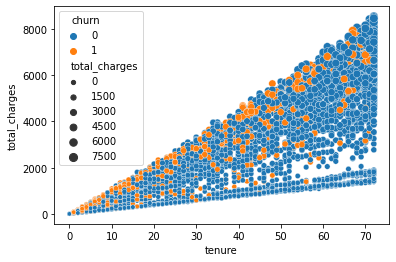

In [12]:
sns.scatterplot(data=EDA_df, x='tenure', y='total_charges', hue='churn', size="total_charges",)

<AxesSubplot:xlabel='monthly_charges', ylabel='total_charges'>

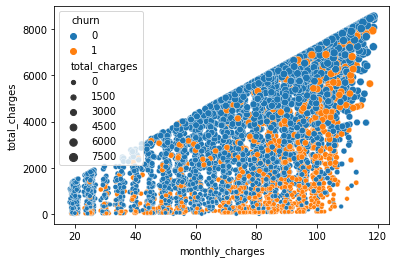

In [13]:
sns.scatterplot(data=EDA_df, x='monthly_charges', y='total_charges', hue='churn', size='total_charges')

<AxesSubplot:xlabel='monthly_charges', ylabel='total_charges'>

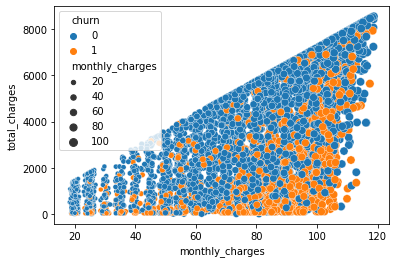

In [14]:
sns.scatterplot(data=EDA_df, x='monthly_charges', y='total_charges', hue='churn', size='monthly_charges')

# Distribution Plot

## tenure

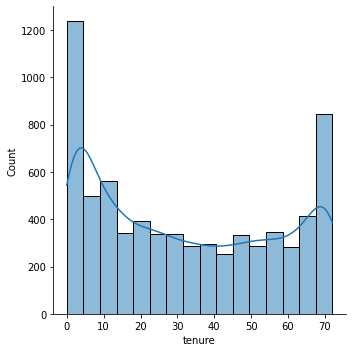

In [15]:
sns.displot(data=EDA_df, x="tenure", kde=True)

## monthly_charges

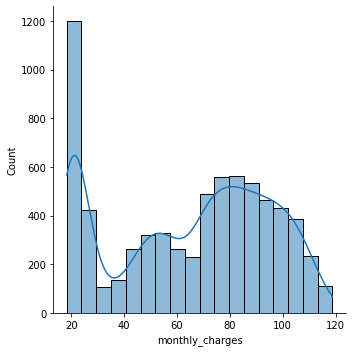

In [16]:
sns.displot(data=EDA_df, x="monthly_charges", kde=True)

## total_charges

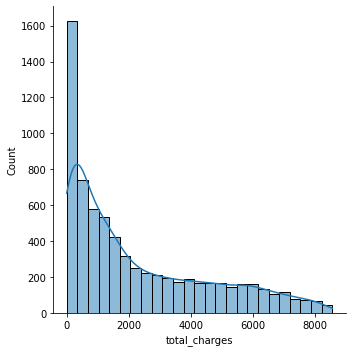

In [17]:
sns.displot(data=EDA_df, x="total_charges", kde=True)

# Pricipal Component Analysis

In [18]:
PCA_df = EDA_df.drop(['customer_id', 'churn'], axis=1)

## Decomposition dataframe with PCA

In [19]:
pca = PCA(n_components=19)
pca.fit(PCA_df)

PCA(n_components=19)

## Explained Variance

In [20]:
for component, explained_variance_ratio in enumerate(pca.explained_variance_ratio_):
    print(f'{component + 1} component : {(explained_variance_ratio * 100):.10f}%')

1 component : 99.9860533498%
2 component : 0.0122279741%
3 component : 0.0016613014%
4 component : 0.0000090187%
5 component : 0.0000056512%
6 component : 0.0000048879%
7 component : 0.0000045501%
8 component : 0.0000042486%
9 component : 0.0000040868%
10 component : 0.0000039285%
11 component : 0.0000034992%
12 component : 0.0000030010%
13 component : 0.0000028844%
14 component : 0.0000026895%
15 component : 0.0000024297%
16 component : 0.0000023056%
17 component : 0.0000021444%
18 component : 0.0000016451%
19 component : 0.0000004040%


## Explained Variance in Plot

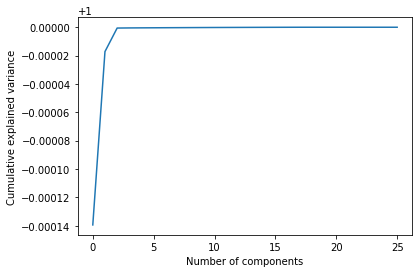

In [21]:
pca = PCA().fit(pd.read_csv('../datasets/EDA_df.csv').drop(['customer_id', 'churn'], axis=1))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

## Show components

In [22]:
pca = PCA()

X_pca = pca.fit_transform(PCA_df)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1        PC2        PC3       PC4       PC5       PC6       PC7  \
0 -2250.140168  -8.875578 -16.866909  0.310244  1.330575 -0.581181  0.139829   
1  -343.307766  -6.442218   2.066769  1.031443 -0.586847  0.670418  0.518198   
2 -2172.079451  11.894392  -6.304946  0.996203  0.199785  0.399828 -0.550937   
3  -376.133273 -24.311497   5.863689  1.276657 -0.255542  0.529864  0.415065   
4 -2138.236258  26.899403   0.762780 -0.629727  0.265090 -0.514603  0.052000   

        PC8       PC9      PC10  ...      PC17      PC18      PC19  \
0  0.036804  0.207204  0.118728  ... -0.080414 -0.179604  0.292544   
1  0.187415 -0.040029  0.790196  ...  0.062597 -0.345934 -0.088951   
2  0.177489  0.594255  0.400535  ... -0.035270  0.029070 -0.076454   
3  0.900833  0.197707  0.352000  ...  0.059389  0.281295  0.312513   
4 -0.054910  0.088764  0.167243  ... -0.058307 -0.269241  0.076055   

           PC20          PC21          PC22          PC23          PC24  \
0  1.857719e-12  2.327580e-13 -7.543052e-13 -1.885748e-12  3.725378e-13   
1 -1.959378e-12  1.534972e-12  5.529232e-12  2.130034e-12 -1.277767e-12   
2  6.754341e-12  1.199261e-11 -6.477734e-12  6.721377e-12 -6.477693e-12   
3 -4.279943e-13  5.256020e-13  2.082785e-13 -3.273416e-12 -1.161996e-11   
4  1.268531e-12  4.874019e-12  2.849394e-13  7.531443e-12  1.184094e-11   

           PC25          PC26  
0  1.143802e-13  2.310789e-13  
1 -5.283711e-13 -1.004040e-12  
2 -3.190559e-12 -4.582641e-12  
3 -2.768863e-12  1.397949e-11  
4 -3.304551e-12  1.081104e-11  

[5 rows x 26 columns]

## Factor Loading

In [23]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=PCA_df.columns,
)

loadings

PC1           PC2  \
gender                                 -6.753161e-09 -3.576108e-04   
senior_citizen                          1.680737e-05  2.866084e-03   
partner                                -1.110223e-16  1.110223e-15   
dependents                              2.710505e-20  0.000000e+00   
phone_service                           5.169879e-26  0.000000e+00   
multiple_lines                         -0.000000e+00 -1.058791e-22   
online_security                         8.222837e-05  6.513561e-04   
online_backup                           1.069896e-04  2.745130e-03   
device_protection                       1.094327e-04  3.498164e-03   
tech_support                            8.653820e-05  1.367278e-03   
streaming_tv                            1.106778e-04  7.383932e-03   
streaming_movies                        1.118861e-04  7.265580e-03   
paperless_billing                       3.447053e-05  6.327301e-03   
internet_service_DSL                   -1.099213e-05 -3.042891e-03   
internet_service_fiber_optic            7.933797e-05  1.417827e-02   
no_internet_service                    -6.834583e-05 -1.113538e-02   
contract_month_to_month                -9.756253e-05  9.887026e-03   
contract_one_year                       3.059350e-05 -2.293498e-03   
contract_two_year                       6.696903e-05 -7.593528e-03   
payment_method_bank_transfer_automatic  3.409151e-05 -2.043390e-03   
payment_method_credit_card_automatic    3.323071e-05 -2.154075e-03   
payment_method_electronic_check        -1.242936e-05  7.616091e-03   
payment_method_mailed_check            -5.489286e-05 -3.418627e-03   
tenure                                  8.962857e-03 -4.419418e-01   
monthly_charges                         8.656788e-03  8.966168e-01   
total_charges                           9.999223e-01 -3.804128e-03   

                                                 PC3           PC4  \
gender                                 -4.745096e-04 -1.116027e-02   
senior_citizen                          2.245889e-03 -1.070407e-01   
partner                                 2.879641e-16  3.772373e-15   
dependents                             -2.220446e-16  1.387779e-16   
phone_service                           2.775558e-17  1.110223e-16   
multiple_lines                         -5.421011e-20  1.110223e-16   
online_security                         4.487741e-04  3.350668e-01   
online_backup                           6.271759e-04  1.813687e-01   
device_protection                       1.915383e-03  2.165799e-01   
tech_support                            1.953297e-04  3.591952e-01   
streaming_tv                            3.941280e-03  9.385366e-02   
streaming_movies                        3.854800e-03  1.017962e-01   
paperless_billing                       3.183813e-03 -9.561676e-02   
internet_service_DSL                   -2.402136e-03  6.053371e-01   
internet_service_fiber_optic            6.848231e-03 -3.767281e-01   
no_internet_service                    -4.446095e-03 -2.286091e-01   
contract_month_to_month                -8.674415e-03 -1.519868e-01   
contract_one_year                      -2.445305e-04  8.289691e-02   
contract_two_year                       8.918946e-03  6.908985e-02   
payment_method_bank_transfer_automatic  4.467132e-03  4.334647e-02   
payment_method_credit_card_automatic    3.024824e-03  8.162029e-02   
payment_method_electronic_check         3.474599e-03 -1.792290e-01   
payment_method_mailed_check            -1.096655e-02  5.426226e-02   
tenure                                  8.967831e-01 -1.918532e-03   
monthly_charges                         4.418149e-01  5.946653e-03   
total_charges                          -1.186782e-02 -1.572314e-04   

                                                 PC5           PC6  \
gender                                  4.040597e-02  9.825372e-01   
senior_citizen                          1.526303e-01 -7.083019e-03   
partner                                -2.327132e-15  2.2

# Insight
- Semua data observasi merupakan data yang unique.
- Pelanggan lebih banyak bernilai 'no' untuk target churn.
- Korelasi target churn dengan hampir semua feature pada dataset, baik secara linear ataupun non-linear tidak terlalu kuat.
- Feature total_charges dan tenure, relasinya kuat baik secara linear maupun non-linear.
- Setelah dilakukan dekomposisi menggunakan PCA, hasil yang didapatkan adalah dengan 1 component explain variance yang didapatkan adalah sebesar 99.9%

# Supporting Articles

- https://www.europeanbusinessreview.com/how-costly-is-customer-churn-in-the-telecom-industry/
- https://www.researchgate.net/publication/257920014_Customer_Churn_Prediction_in_Telecommunication_A_Decade_Review_and_Classification